# Financial Prediction using Machine Learning Part III: Random Forest

In [29]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
# Import Libaries
import workshop_library as wl
from workshop_library.training import training
from workshop_library import financial_backtest
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (20.0, 8.0)
fontsize=20
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [31]:
# load the financial time series data
df = pd.read_csv('financial_data.csv')

## Feed Data into a Machine Learning Algorithm to forecast e.g. the next day

In [41]:
backtest_settings = {
    'backtest_method': 'walk_forward_rolling',#'simple_split', #walk_forward_rolling, walk_forward_extending
    'training_window': 1000, #number of days that are used for the training in a rolling or extending procedure
    'step_size': 10, #number of days the training frame is shifted forward in each iteration
    'test_train_diff_days': 1 #time gap between training and test
}

model = RandomForestClassifier(
    n_estimators=500, 
    max_depth=2, 
    min_samples_leaf = .05, 
    random_state=42
)
target = 'direction_target' #as an alternative, try 'ret_10d
risk_free_interest = .02 #
is_regr_class= 'regression'

In [42]:
# Exectue the model training
result = training(
        df=df,
        model=model,
        backtest_settings=backtest_settings,
        date_column='Date',
        target=target,
        hide_columns=['ret_10d', 'target', 'ret_1d', 'ret_20d', 'direction_target']
    )

## Evaluate the correctness of linear regression results

In [43]:
# Calculate the directional_correctness
direction_correct_ratio = ((result['prediction'] > 0) == (result['truth'] > 0)).mean()
print('Directional Correctness: %1.1f %%' % ( direction_correct_ratio* 100))

Directional Correctness: 51.4 %


In [44]:
# Calculate the median absolute deviation
median_absolute_deviation = (result['prediction'] - result['truth']).abs().median()
print('Median Absolute Deviation: %1.3f' % ( median_absolute_deviation* 100))

Median Absolute Deviation: 0.000


## Run a financial backtest with this model

Sharpe Ratio: 0.18
Annual Return: 0.03


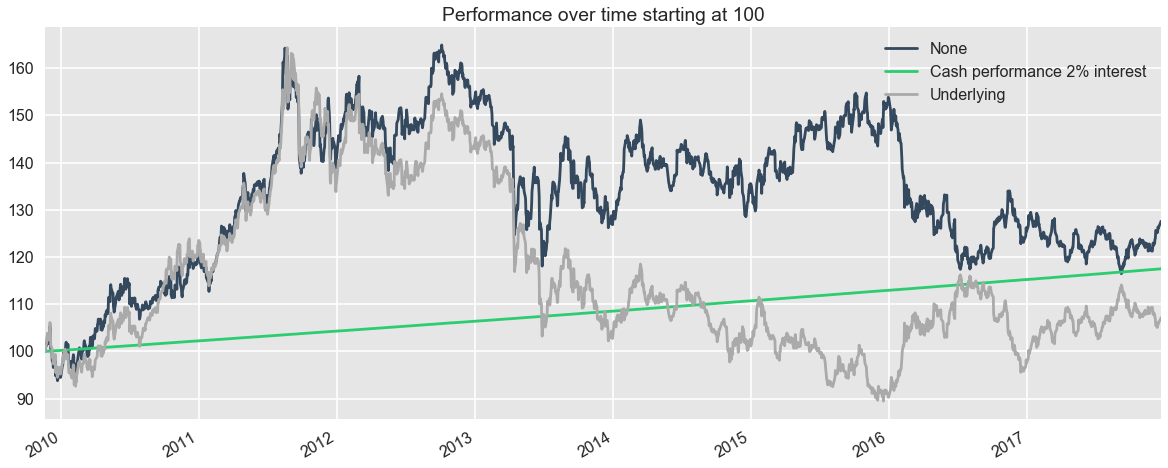

In [40]:
# Run a financial backtest
fb = financial_backtest.SimpleBacktest(prediction_series=result['prediction'], underlying_series=df['close'], is_regr_class= is_regr_class)
ax = fb.performance.plot(title = 'Performance over time starting at 100');
ax.plot(fb.performance.index, 100*np.cumprod(pd.Series([np.power(1+risk_free_interest, 1/250)] * fb.performance.shape[0])), label = 'Cash performance 2% interest')
ax.plot(fb.performance.index, pd.Series(1+df.loc[result.index].close.pct_change().fillna(0)).cumprod()*100, color = '#AAAAAA', label = 'Underlying')
ax.legend()
print('Sharpe Ratio: %1.2f' % fb.sharpe_ratio)
print('Annual Return: %1.2f' % fb.return_per_annum)

## Analyze the constructed random forest

In [11]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, x_train.columns[indices[f]], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(x_train.shape[1]), importances[indices],
       color="r", yerr=std[indices] / np.sqrt(len(importances)), align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])

NameError: name 'clf' is not defined